**Investigating the Adoption of Research Software**

***Survey***

In [2]:
from google.colab import files
import io
uploaded = files.upload()


Saving Survey_Perfil_Desenvolvedor_People.xlsx to Survey_Perfil_Desenvolvedor_People (1).xlsx


In [3]:
file_name = next(iter(uploaded))
file_name

'Survey_Perfil_Desenvolvedor_People.xlsx'

In [4]:
%matplotlib inline

import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statistics as s



In [5]:
df = pd.read_excel(file_name)


df

,PERFIL,TEMPO_USO,FREQUENCIA_USO,IDADE,GENERO,FORMACAO,ANOS_EXPERIENCIA,PESSOAIS_D06F01,PESSOAIS_D06F02,PESSOAIS_D06F03,PESSOAIS_D06F04,PESSOAIS_D06F05
0,2,1,4,1,1,2,2,5,5,5,5,5
1,2,2,5,1,2,2,2,4,4,3,3,3
2,2,4,5,1,2,4,3,3,4,4,5,5
3,2,4,3,4,1,5,6,4,5,3,4,5
4,2,4,5,5,2,6,6,4,4,4,4,5
5,2,4,4,3,2,5,4,4,4,4,5,5
6,2,4,5,5,2,5,6,5,5,4,4,5
7,2,3,3,4,2,4,2,4,2,4,5,5
8,2,3,5,1,2,3,2,2,3,3,5,5
9,2,3,3,1,2,4,2,5,5,5,4,5


In [6]:
# Selecting columns
df1 = df.loc[:, lambda df:['PESSOAIS_D06F01', 'PESSOAIS_D06F02', 'PESSOAIS_D06F03', 'PESSOAIS_D06F04', 'PESSOAIS_D06F05']]
# columns 09 and 10 are related to proc and metric out of SWEBOK.
df1.columns = ['D06F01', 'D06F02','D06F03', 'D06F04', 'D06F05']
df1

,D06F01,D06F02,D06F03,D06F04,D06F05
0,5,5,5,5,5
1,4,4,3,3,3
2,3,4,4,5,5
3,4,5,3,4,5
4,4,4,4,4,5
5,4,4,4,5,5
6,5,5,4,4,5
7,4,2,4,5,5
8,2,3,3,5,5
9,5,5,5,4,5


In [7]:
df1.style.format("{:.2}").set_properties(**{'text-align': 'center'}).set_table_styles([
    dict(selector="th", props=[("text-align", "center")]),]).hide_index()


<ipython-input-7-1f36c6b33afc>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df1.style.format("{:.2}").set_properties(**{'text-align': 'center'}).set_table_styles([


ValueError: ignored

In [8]:
print("\n\033[1mReport Investigating Research Software (Survey) \033[0m")
print("\nTotal of respondents = ", len(df1))



Report Investigating Research Software (Survey) 

Total of respondents =  30



D06F01 = Have training in Software Engineering

D06F02 = Having personal competence	

D06F03 = Having good communication and knowing how to negotiate deliveries	

D06F04 = Have a commitment to the project

D06F05 = Have a collaborative attitude	


In [9]:
df1.describe().style.format("{:.4}")

,D06F01,D06F02,D06F03,D06F04,D06F05
count,30.0,30.0,30.0,30.0,30.0
mean,3.867,4.533,4.3,4.633,4.733
std,1.042,0.7761,0.7022,0.5561,0.5208
min,1.0,2.0,3.0,3.0,3.0
25%,3.0,4.0,4.0,4.0,5.0
50%,4.0,5.0,4.0,5.0,5.0
75%,5.0,5.0,5.0,5.0,5.0
max,5.0,5.0,5.0,5.0,5.0


In [10]:
df3_grafico = pd.DataFrame({'D06F01 (%)':[(len(df1.loc[df1['D06F01'] == 5.0])/30) *100, (len(df1.loc[df1['D06F01'] == 4.0])/30) *100, (len(df1.loc[df1['D06F01'] == 3.0])/30) *100, (len(df1.loc[df1['D06F01'] == 2.0])/30) *100, (len(df1.loc[df1['D06F01'] == 1.0])/30) *100, (len(df1.loc[df1['D06F01'] == 0.0])/30) *100],
                   'D06F02 (%)':[(len(df1.loc[df1['D06F02'] == 5.0])/30) *100, (len(df1.loc[df1['D06F02'] == 4.0])/30) *100, (len(df1.loc[df1['D06F02'] == 3.0])/30) *100, (len(df1.loc[df1['D06F02'] == 2.0])/30) *100, (len(df1.loc[df1['D06F02'] == 1.0])/30) *100, (len(df1.loc[df1['D06F02'] == 0.0])/30) *100],
                   'D06F03 (%)':[(len(df1.loc[df1['D06F03'] == 5.0])/30) *100, (len(df1.loc[df1['D06F03'] == 4.0])/30) *100, (len(df1.loc[df1['D06F03'] == 3.0])/30) *100, (len(df1.loc[df1['D06F03'] == 2.0])/30) *100, (len(df1.loc[df1['D06F03'] == 1.0])/30) *100, (len(df1.loc[df1['D06F03'] == 0.0])/30) *100],
                   'D06F04 (%)':[(len(df1.loc[df1['D06F04'] == 5.0])/30) *100, (len(df1.loc[df1['D06F04'] == 4.0])/30) *100, (len(df1.loc[df1['D06F04'] == 3.0])/30) *100, (len(df1.loc[df1['D06F04'] == 2.0])/30) *100, (len(df1.loc[df1['D06F04'] == 1.0])/30) *100, (len(df1.loc[df1['D06F04'] == 0.0])/30) *100],
                   'D06F05 (%)':[(len(df1.loc[df1['D06F05'] == 5.0])/30) *100, (len(df1.loc[df1['D06F05'] == 4.0])/30) *100, (len(df1.loc[df1['D06F05'] == 3.0])/30) *100, (len(df1.loc[df1['D06F05'] == 2.0])/30) *100, (len(df1.loc[df1['D06F05'] == 1.0])/30) *100, (len(df1.loc[df1['D06F05'] == 0.0])/30) *100],
                     })
# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know']
df3_grafico.index = index_

pd.options.display.float_format = '{:.2f}'.format

df3_grafico

center_aligned_df = df3_grafico.style.set_properties(**{'text-align': 'center'})
 
center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df


df3_grafico


,D06F01 (%),D06F02 (%),D06F03 (%),D06F04 (%),D06F05 (%)
Very important,30.00,66.67,43.33,66.67,76.67
Important,40.00,23.33,43.33,30.00,20.00
Median important,20.00,6.67,13.33,3.33,3.33
Little important,6.67,3.33,0.00,0.00,0.00
Nothing important,3.33,0.00,0.00,0.00,0.00
I don't know,0.00,0.00,0.00,0.00,0.00


In [11]:
df3_grafico

,D06F01 (%),D06F02 (%),D06F03 (%),D06F04 (%),D06F05 (%)
Very important,30.00,66.67,43.33,66.67,76.67
Important,40.00,23.33,43.33,30.00,20.00
Median important,20.00,6.67,13.33,3.33,3.33
Little important,6.67,3.33,0.00,0.00,0.00
Nothing important,3.33,0.00,0.00,0.00,0.00
I don't know,0.00,0.00,0.00,0.00,0.00


In [12]:
df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
df4


,D06F01 (%),D06F02 (%),D06F03 (%),D06F04 (%),D06F05 (%)
Very important,30.00,66.67,43.33,66.67,76.67
Important,40.00,23.33,43.33,30.00,20.00


In [13]:

df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)

df5 

<ipython-input-13-ca688a5b6353>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df4.append(df4.sum(numeric_only=True),ignore_index=True)


,D06F01 (%),D06F02 (%),D06F03 (%),D06F04 (%),D06F05 (%)
0,30.00,66.67,43.33,66.67,76.67
1,40.00,23.33,43.33,30.00,20.00
2,70.00,90.00,86.67,96.67,96.67


In [14]:
df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)

# Create the index
index_ = ['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']
df3_grafico.index = index_

df3_grafico

<ipython-input-14-05e31a08c36a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3_grafico = df3_grafico.append(df4.sum(numeric_only=True),ignore_index=True)


,D06F01 (%),D06F02 (%),D06F03 (%),D06F04 (%),D06F05 (%)
Very important,30.00,66.67,43.33,66.67,76.67
Important,40.00,23.33,43.33,30.00,20.00
Median important,20.00,6.67,13.33,3.33,3.33
Little important,6.67,3.33,0.00,0.00,0.00
Nothing important,3.33,0.00,0.00,0.00,0.00
I don't know,0.00,0.00,0.00,0.00,0.00
Total,70.00,90.00,86.67,96.67,96.67


In [15]:
df3_grafico.sort_values(by=['Total'], axis=1, ascending=[False])

,D06F05 (%),D06F04 (%),D06F02 (%),D06F03 (%),D06F01 (%)
Very important,76.67,66.67,66.67,43.33,30.00
Important,20.00,30.00,23.33,43.33,40.00
Median important,3.33,3.33,6.67,13.33,20.00
Little important,0.00,0.00,3.33,0.00,6.67
Nothing important,0.00,0.00,0.00,0.00,3.33
I don't know,0.00,0.00,0.00,0.00,0.00
Total,96.67,96.67,90.00,86.67,70.00


In [16]:
#df4 = df3_grafico.loc[df3_grafico.index.isin(['Very important','Important'])]
#df4

#df4['Level'] = df4.index
#df4 = df4.rename_axis('index').reset_index()

df4 = df3_grafico

#df4.style.hide_index()

df5 = df4.transpose()

df5


,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D06F01 (%),30.00,40.00,20.00,6.67,3.33,0.00,70.00
D06F02 (%),66.67,23.33,6.67,3.33,0.00,0.00,90.00
D06F03 (%),43.33,43.33,13.33,0.00,0.00,0.00,86.67
D06F04 (%),66.67,30.00,3.33,0.00,0.00,0.00,96.67
D06F05 (%),76.67,20.00,3.33,0.00,0.00,0.00,96.67


In [17]:
df5[['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']] = df5[['Very important', 'Important', 'Median important', 'Little important', 'Nothing important', 'I don\'t know', 'Total']].astype(float)

df6 = df5.sort_values(by=['Total', 'Very important'] , ascending=[False, False])

df6

,Very important,Important,Median important,Little important,Nothing important,I don't know,Total
D06F05 (%),76.67,20.00,3.33,0.00,0.00,0.00,96.67
D06F04 (%),66.67,30.00,3.33,0.00,0.00,0.00,96.67
D06F02 (%),66.67,23.33,6.67,3.33,0.00,0.00,90.00
D06F03 (%),43.33,43.33,13.33,0.00,0.00,0.00,86.67
D06F01 (%),30.00,40.00,20.00,6.67,3.33,0.00,70.00


In [18]:
df_new1 = df6.loc['D06F04 (%)': 'D06F05 (%)']
df_new1 = df_new1.sort_values(by=['Very important'] , ascending=[False])

df_new2 = df6.loc['D06F01 (%)': 'D06F03 (%)']


frames = [df_new2, df_new1 ]

result = pd.concat(frames)

result


,Very important,Important,Median important,Little important,Nothing important,I don't know,Total


In [19]:
df7 = df6.transpose()

df7

,D06F05 (%),D06F04 (%),D06F02 (%),D06F03 (%),D06F01 (%)
Very important,76.67,66.67,66.67,43.33,30.00
Important,20.00,30.00,23.33,43.33,40.00
Median important,3.33,3.33,6.67,13.33,20.00
Little important,0.00,0.00,3.33,0.00,6.67
Nothing important,0.00,0.00,0.00,0.00,3.33
I don't know,0.00,0.00,0.00,0.00,0.00
Total,96.67,96.67,90.00,86.67,70.00


In [20]:
df7 = df7.drop(df7.index[6])

df7

,D06F05 (%),D06F04 (%),D06F02 (%),D06F03 (%),D06F01 (%)
Very important,76.67,66.67,66.67,43.33,30.00
Important,20.00,30.00,23.33,43.33,40.00
Median important,3.33,3.33,6.67,13.33,20.00
Little important,0.00,0.00,3.33,0.00,6.67
Nothing important,0.00,0.00,0.00,0.00,3.33
I don't know,0.00,0.00,0.00,0.00,0.00


D06F01 = Have training in Software Engineering

D06F02 = Having personal competence

D06F03 = Having good communication and knowing how to negotiate deliveries

D06F04 = Have a commitment to the project

D06F05 = Have a collaborative attitude

In [21]:


df7.columns = ['Have a collaborative attitude','Have a commitment to the project', 'Having personal competence', 'Having good communication and knowing how to negotiate deliveries', 'Have training in Software Engineering' ]

df7


,Have a collaborative attitude,Have a commitment to the project,Having personal competence,Having good communication and knowing how to negotiate deliveries,Have training in Software Engineering
Very important,76.67,66.67,66.67,43.33,30.00
Important,20.00,30.00,23.33,43.33,40.00
Median important,3.33,3.33,6.67,13.33,20.00
Little important,0.00,0.00,3.33,0.00,6.67
Nothing important,0.00,0.00,0.00,0.00,3.33
I don't know,0.00,0.00,0.00,0.00,0.00



  Horizontal Bar Chart - Research Software - People Factors - Ordered by Combined Very Important and Important Ratings 


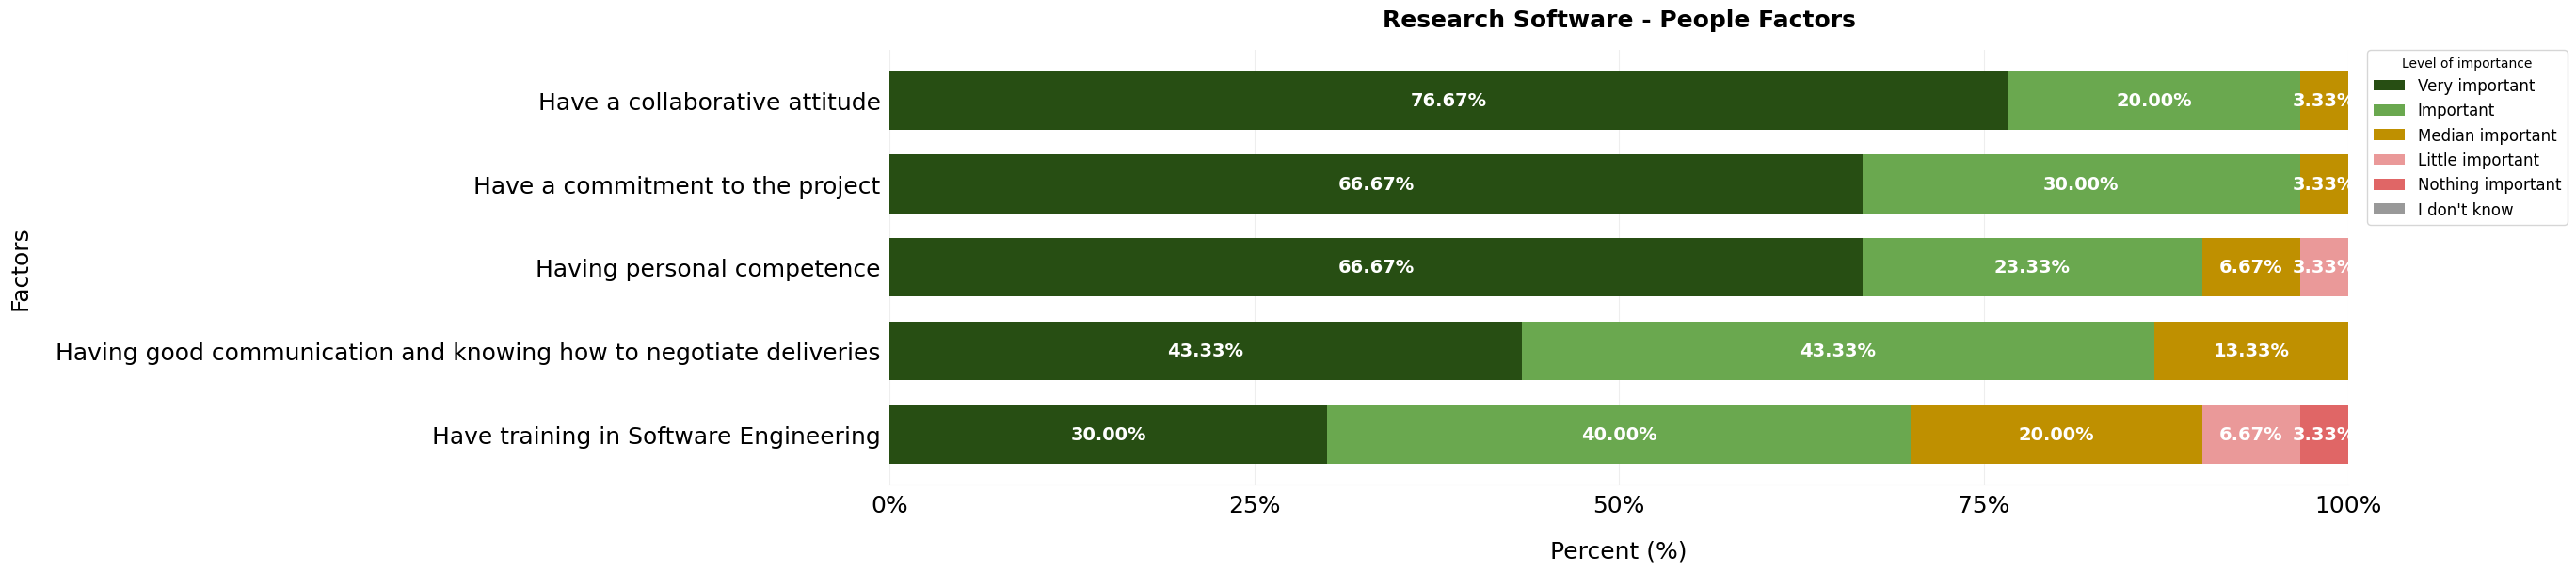

In [22]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  


# Plot stacked horizontal bar chart
#df3_grafico.plot.barh(stacked=True, title="RS", xlabel ="Frequency", ylabel ="Factors" )
#plt.show()

#plotdata = df3_grafico
plotdata = df7
plotdata.head()


# Define a dictionary mapping variable values to colours:
colours = {"Very important": "#274E13", "Important": "#6AA84F", "Median important": "#BF9000", "Little important": "#EA9999", "Nothing important": "#E06666", "I don\'t know": "#999999"}

plt.rcParams["figure.figsize"] = (20, 6)
#plt.figure(figsize=(10,4))
#ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours).legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.25, 1))

ax = plotdata.transpose().plot(kind="barh", stacked=True, color=colours, width=0.7, fontsize=18)



## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=14
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    
    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if width > 1:
      label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      # plot only when height is greater than specified value
      if height > 0:
         ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize, color='white', weight='bold')
    # plot only when width is greater than specified value <= 2 
    #else:
     # if width >= 0:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #  ax.text(label_x, label_y, label_text, ha='left', va='top', fontsize=FigBarsFontSize)
     # else:
     #   label_text = f'{width:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
     #   ax.text(label_x, label_y, label_text, ha='left', va='bottom', fontsize=FigBarsFontSize)  


    # plot only when height is greater than specified value
#    if height > 0:
#        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)



ax.legend(loc='upper right', ncol=1, title="Level of importance", borderaxespad=0, bbox_to_anchor=(1.15, 1), fontsize=12)

#for rowNum,row in ax.iterrows():
#    xpos = 0
#    for val in row:
#        xpos += val
#        ax.text(xpos + 1, rowNum-0.05, str(val), color='black')
#    xpos = 0

#for c in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
#    labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c ]
        # set the bar label
#    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold')

# add labels
#plt.xlabel("Percent (%)", labelpad=14, fontsize=12)
#plt.ylabel("Factors", labelpad=14, fontsize=12)


#ax = ax.sort_values(by=['Very important', 'Important'], ascending=False)



# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')


ax.set_xlim(0, 100)
ticks = ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(("0%", "25%", "50%", "75%", "100%"), fontsize=18) 

# add labels
ax.set_title("Research Software - People Factors", pad=18, fontsize=18, weight='bold')
ax.set_ylabel("Factors", labelpad=18, fontsize=18)
ax.set_xlabel("Percent (%)", labelpad=18, fontsize=18)
#plt.show()

plt.gca().invert_yaxis()

print ('\n \033[1m Horizontal Bar Chart - Research Software - People Factors - Ordered by Combined Very Important and Important Ratings \033[0m')


fig.savefig('my_figure.png')